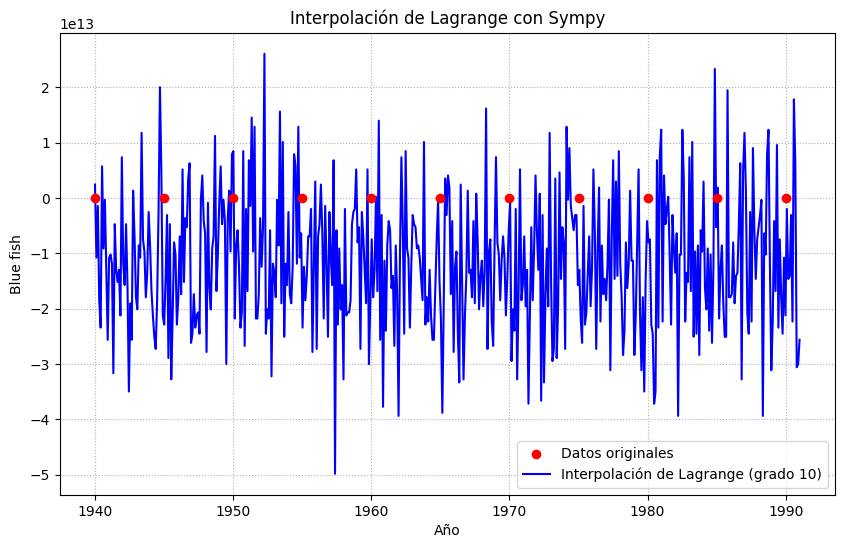

Polinomio de Lagrange:
-3389*x**10/7087500000 + 2664379*x**9/283500000 - 392751773*x**8/4725000 + 823387395613*x**7/1890000 - 809148073010237*x**6/540000 + 76334255865421663*x**5/21600 - 262545276910486486387*x**4/45360 + 29485554344085968021963*x**3/4536 - 402426334427423423229949*x**2/84 + 131816926993017977200802525*x/63 - 411209488479775003695995000


In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Datos
x_vals = [i for i in range(1940, 1991, 5)]
y_vals = [15000, 150000, 150000, 275000, 270000, 280000, 290000,
          650000, 1200000, 1500000, 2750000]

# Variable simbólica
x = sp.Symbol('x')

# Polinomio de Lagrange con sympy
lagrange_poly = sp.interpolate(list(zip(x_vals, y_vals)), x)

# Convertir a función numérica para graficar
f_lagrange = sp.lambdify(x, lagrange_poly, 'numpy')

# Rango de evaluación
X = np.linspace(1940, 1991, 500)
Y = f_lagrange(X)

# Gráfica
plt.figure(figsize=(10,6))
plt.scatter(x_vals, y_vals, color="red", label="Datos originales", zorder=5)
plt.plot(X, Y, label=f"Interpolación de Lagrange (grado {len(x_vals)-1})", color="blue")
plt.xlabel("Año")
plt.ylabel("Blue fish")
plt.title("Interpolación de Lagrange con Sympy")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

# Mostrar polinomio (simplificado)
print("Polinomio de Lagrange:")
print(sp.simplify(lagrange_poly))


In [2]:
x_vals

[1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990]

In [3]:
y_vals

[15000,
 150000,
 150000,
 275000,
 270000,
 280000,
 290000,
 650000,
 1200000,
 1500000,
 2750000]

In [42]:
y_mod = [(np.log10(i)) for i in y_vals]

In [43]:
y_mod

[np.float64(4.176091259055681),
 np.float64(5.176091259055681),
 np.float64(5.176091259055681),
 np.float64(5.439332693830263),
 np.float64(5.431363764158987),
 np.float64(5.447158031342219),
 np.float64(5.4623979978989565),
 np.float64(5.812913356642856),
 np.float64(6.079181246047625),
 np.float64(6.176091259055681),
 np.float64(6.439332693830263)]

In [44]:
len(y_mod)

11

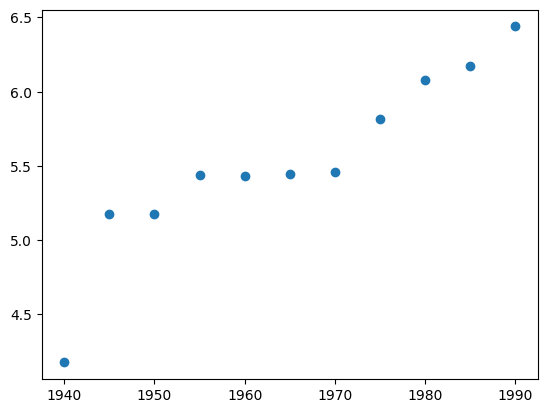

In [45]:
plt.scatter(x_vals, y_mod)

In [46]:
import pymethods as pm
recta, pendiente, intercepto = pm.recta_minimos_cuadrados(x_vals, y_mod)

In [47]:
type(recta)

sympy.core.add.Add

In [48]:
pendiente

2646381666839327/77405618595430400

In [49]:
intercepto

-1908874042142347387/30962247438172160

In [50]:
import sympy as sp
import numpy as np

def calcular_r2(x_vals, y_vals, modelo):
    """
    Calcula el coeficiente de determinación R^2 para un modelo simbólico de Sympy.
    
    x_vals: lista de valores x
    y_vals: lista de valores y observados
    modelo: expresión simbólica en función de x (ej: recta, polinomio, etc.)
    """
    x = sp.Symbol('x')
    f_modelo = sp.lambdify(x, modelo, 'numpy')  # convierte sympy -> función numpy
    
    # Convertir a numpy arrays
    X = np.array(x_vals, dtype=float)
    Y = np.array(y_vals, dtype=float)
    
    # Evaluar el modelo
    Y_pred = f_modelo(X)
    
    # Calcular R^2
    SS_res = np.sum((Y - Y_pred)**2)   # suma de residuos
    SS_tot = np.sum((Y - np.mean(Y))**2)  # variación total
    R2 = 1 - SS_res/SS_tot
    
    return float(R2)


In [51]:
calcular_r2(x_vals, y_mod, recta)

0.8597046138508819